In [ ]:
!pip install ultralytics -q


In [1]:

from datasets import load_dataset     # To load Hugging Face datasets
from ultralytics import YOLO
import cv2
import os

In [2]:
ds = load_dataset("HuangYiYang/Face-Mask-Detection-Dataset")
model = YOLO("yolo11n.pt")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [5]:
print(ds)

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 3833
    })
})


In [6]:
images = ds["train"]["image"]
print(f"Total images: {len(images)}")


Total images: 3833


In [7]:
results = [model(image) for image in images] #detect faces in all images


0: 640x512 1 person, 68.8ms
Speed: 33.2ms preprocess, 68.8ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 512)

0: 640x384 1 person, 141.4ms
Speed: 2.0ms preprocess, 141.4ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 384)

0: 640x480 (no detections), 77.3ms
Speed: 2.5ms preprocess, 77.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)

0: 640x544 1 person, 75.9ms
Speed: 2.8ms preprocess, 75.9ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 544)

0: 640x448 2 persons, 62.4ms
Speed: 3.9ms preprocess, 62.4ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 448)

0: 640x448 1 person, 9.1ms
Speed: 2.1ms preprocess, 9.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 448)

0: 640x480 1 car, 9.7ms
Speed: 2.2ms preprocess, 9.7ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)

0: 640x448 1 person, 1 refrigerator, 9.9ms
Speed: 2.2ms preprocess, 9.9ms inference, 2.1ms postprocess per image 

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Streaming output truncated to the last 5000 lines.
0: 608x640 (no detections), 10.6ms
Speed: 3.1ms preprocess, 10.6ms inference, 0.6ms postprocess per image at shape (1, 3, 608, 640)

0: 640x640 (no detections), 13.8ms
Speed: 2.7ms preprocess, 13.8ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 608x640 1 person, 11.7ms
Speed: 3.1ms preprocess, 11.7ms inference, 1.7ms postprocess per image at shape (1, 3, 608, 640)

0: 576x640 1 person, 10.9ms
Speed: 2.9ms preprocess, 10.9ms inference, 1.6ms postprocess per image at shape (1, 3, 576, 640)

0: 576x640 1 person, 10.3ms
Speed: 2.8ms preprocess, 10.3ms inference, 1.7ms postprocess per image at shape (1, 3, 576, 640)

0: 576x640 (no detections), 13.2ms
Speed: 2.5ms preprocess, 13.2ms inference, 0.6ms postprocess per image at shape (1, 3, 576, 640)

0: 512x640 (no detections), 12.0ms
Speed: 2.3ms preprocess, 12.0ms inference, 0.8ms postprocess per image at shape (1, 3, 512, 640)

0: 640x640 1 person, 11.0ms
Speed: 3.5m


0: 640x512 1 person, 9.6ms
Speed: 2.2ms preprocess, 9.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 512)


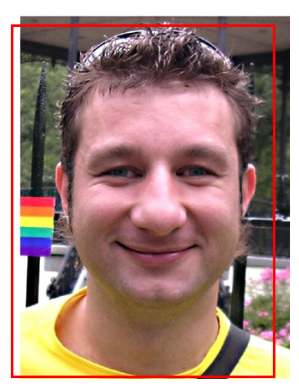


0: 640x640 1 person, 9.5ms
Speed: 3.6ms preprocess, 9.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


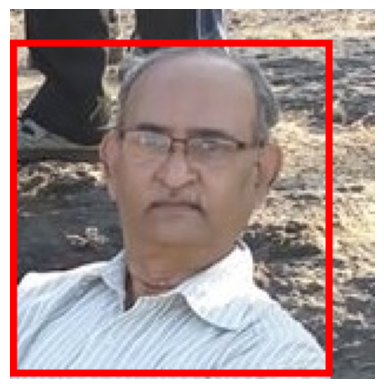


0: 640x512 1 person, 11.2ms
Speed: 2.1ms preprocess, 11.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 512)


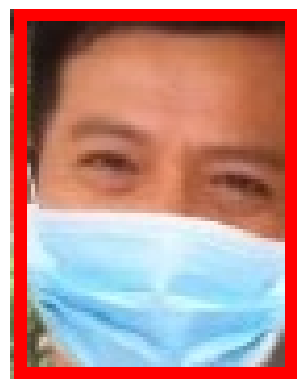


0: 640x448 1 person, 10.5ms
Speed: 2.2ms preprocess, 10.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 448)


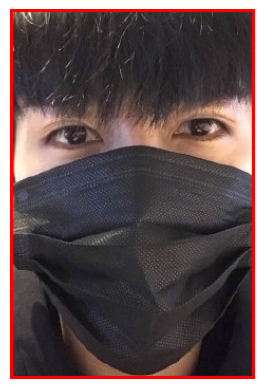


0: 640x544 1 person, 13.2ms
Speed: 2.7ms preprocess, 13.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 544)


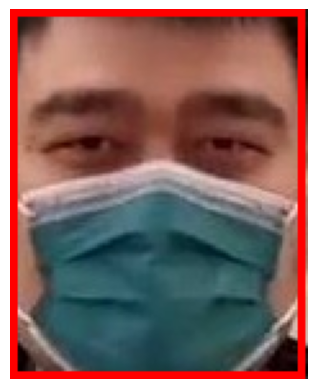

In [13]:
import random
sample_indices= random.sample(range(len(images)), 5)
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

for idx in sample_indices:
  image=images[idx]
  result=model(image)[0]

  im = image.convert("RGB")
  draw = ImageDraw.Draw(im)
  for box in result.boxes.xyxy:
      x1, y1, x2, y2 = box
      draw.rectangle([x1, y1, x2, y2], outline="red", width=3)

  plt.imshow(im)
  plt.axis("off")
  plt.show()